In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nba_api.stats import endpoints

import warnings
warnings.filterwarnings("ignore")

In [106]:
#importando dados dos jogadores na temporada 2021-22
df_players = endpoints.LeagueLeaders(per_mode48="PerGame").get_data_frames()[0]

#importando dados das equipes na temporada 2021-22
df_teams = endpoints.LeagueDashTeamStats(per_mode_detailed="Per100Plays", rank='N').get_data_frames()[0]

In [107]:
#visualizando os dados
df_players

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201142,1,Kevin Durant,BKN,35,37.2,10.7,20.6,0.520,1.9,...,0.893,0.6,7.0,7.5,5.9,0.8,0.9,3.0,29.7,31.2
1,2544,2,LeBron James,LAL,30,36.9,10.9,20.7,0.524,2.9,...,0.769,1.1,6.3,7.4,6.6,1.7,1.1,3.2,29.1,31.5
2,203507,3,Giannis Antetokounmpo,MIL,34,32.5,10.0,18.4,0.541,1.1,...,0.700,1.9,9.6,11.4,6.0,1.1,1.4,3.4,28.4,33.4
3,1629027,4,Trae Young,ATL,36,34.6,9.5,21.0,0.452,2.7,...,0.897,0.8,3.3,4.0,9.4,0.9,0.1,4.1,27.7,25.9
4,203954,5,Joel Embiid,PHI,29,32.9,8.6,17.9,0.482,1.2,...,0.809,1.9,8.6,10.5,4.3,1.1,1.4,3.0,27.1,30.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,203476,246,Gorgui Dieng,ATL,29,9.6,1.2,2.7,0.462,0.6,...,0.762,0.9,2.3,3.2,0.9,0.3,0.3,0.6,3.6,6.2
246,203107,247,Tomas Satoransky,NOP,31,14.9,1.0,3.3,0.311,0.2,...,0.760,0.6,1.5,2.0,2.3,0.5,0.0,0.7,2.8,4.4
247,1628975,248,Jevon Carter,BKN,32,11.4,0.9,3.2,0.294,0.7,...,0.750,0.2,1.3,1.5,0.9,0.4,0.3,0.4,2.7,3.0
248,203503,249,Tony Snell,POR,28,12.4,0.8,2.1,0.356,0.6,...,1.000,0.3,1.2,1.4,0.6,0.2,0.1,0.3,2.2,2.9


In [108]:
#visualizando os dados
df_teams.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,40,17,23,0.425,43.0,36.4,79.2,0.459,...,1,29,25,13,4,11,6,22,10,Atlanta Hawks
1,1610612738,Boston Celtics,42,21,21,0.500,43.3,34.6,77.8,0.445,...,16,15,3,12,8,12,21,10,10,Boston Celtics
2,1610612751,Brooklyn Nets,40,26,14,0.650,42.9,36.7,78.0,0.471,...,18,21,5,19,21,9,4,9,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,42,23,19,0.548,42.1,37.3,80.3,0.464,...,4,4,11,15,9,23,3,17,10,Charlotte Hornets
4,1610612741,Chicago Bulls,39,27,12,0.692,43.5,37.5,78.8,0.475,...,10,9,18,25,12,24,2,7,10,Chicago Bulls


In [109]:
df_teams.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'CFID', 'CFPARAMS'],
      dtype='object')

In [110]:
#analisando as colunas da tabela
df_teams.columns

#podemos observar que algumas colunas não são uteis para análise que queremos realizar, por exemplo as colunas que informa a posição da equipe em determinado fundamento.

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'CFID', 'CFPARAMS'],
      dtype='object')

In [111]:
cols = ['PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'CFID', 'CFPARAMS']

df_teams.drop(labels=cols, axis=1, inplace = True)

In [112]:
df_teams

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS
0,1610612737,Atlanta Hawks,40,17,23,0.425,43.0,36.4,79.2,0.459,...,31.2,40.5,21.2,11.0,5.9,3.8,4.2,15.8,17.4,98.9
1,1610612738,Boston Celtics,42,21,21,0.500,43.3,34.6,77.8,0.445,...,30.9,40.5,20.0,12.5,6.7,5.3,4.2,16.7,17.3,95.4
2,1610612751,Brooklyn Nets,40,26,14,0.650,42.9,36.7,78.0,0.471,...,32.0,40.4,22.9,12.7,6.4,5.0,4.5,17.6,17.6,99.2
3,1610612766,Charlotte Hornets,42,23,19,0.548,42.1,37.3,80.3,0.464,...,28.9,38.1,23.6,11.3,7.9,4.5,4.3,16.8,16.5,99.9
4,1610612741,Chicago Bulls,39,27,12,0.692,43.5,37.5,78.8,0.475,...,30.8,39.0,21.7,12.0,7.2,4.2,4.9,17.0,16.4,101.0
5,1610612739,Cleveland Cavaliers,42,24,18,0.571,43.5,36.1,77.6,0.465,...,32.1,41.3,23.1,13.7,6.6,4.0,4.3,15.1,16.8,97.3
6,1610612742,Dallas Mavericks,41,22,19,0.537,44.3,35.8,79.6,0.450,...,31.5,40.1,21.9,11.3,6.4,3.6,3.8,18.0,18.1,96.8
7,1610612743,Denver Nuggets,39,20,19,0.513,43.9,36.3,78.5,0.462,...,31.5,39.5,23.6,12.8,6.6,3.6,4.4,17.4,17.3,96.2
8,1610612765,Detroit Pistons,40,9,31,0.225,42.4,32.2,77.5,0.415,...,28.5,37.7,19.3,13.5,7.3,4.2,4.6,18.2,17.6,89.0
9,1610612744,Golden State Warriors,40,30,10,0.750,42.9,35.8,76.6,0.467,...,32.4,41.1,24.8,14.1,8.5,4.5,3.4,18.1,15.8,97.8


In [113]:
df_teams.shape

(30, 27)

In [114]:
df_teams.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.610613e+09,41.133333,20.566667,20.566667,0.500833,42.856667,35.466667,78.280000,0.453167,10.96000,...,30.673333,39.840000,21.293333,12.476667,6.850000,4.313333,4.316667,17.106667,17.096667,96.210000
std,8.803408e+00,1.382984,6.078131,6.306446,0.149883,0.827411,1.393664,1.189436,0.016356,1.05458,...,1.274940,1.104099,1.668146,0.920526,0.754184,0.599272,0.542080,0.896712,0.871971,3.151502
min,1.610613e+09,38.000000,7.000000,9.000000,0.167000,41.200000,32.200000,74.600000,0.415000,9.20000,...,27.600000,37.500000,18.500000,11.000000,5.700000,2.800000,3.400000,15.100000,15.400000,89.000000
25%,1.610613e+09,40.000000,16.250000,17.000000,0.389500,42.325000,34.650000,77.650000,0.445500,10.22500,...,30.100000,39.025000,20.000000,11.925000,6.325000,4.025000,3.900000,16.725000,16.575000,94.400000
50%,1.610613e+09,41.000000,21.000000,20.500000,0.506500,42.850000,35.750000,78.150000,0.456000,10.70000,...,30.850000,39.850000,21.200000,12.500000,6.650000,4.250000,4.300000,17.250000,17.100000,96.300000
75%,1.610613e+09,42.000000,25.500000,25.500000,0.597500,43.450000,36.375000,78.950000,0.464750,11.80000,...,31.650000,40.675000,22.650000,13.000000,7.275000,4.575000,4.600000,17.775000,17.600000,98.200000
max,1.610613e+09,44.000000,31.000000,35.000000,0.775000,44.700000,37.500000,81.000000,0.476000,13.40000,...,32.400000,41.400000,24.800000,14.900000,8.700000,5.400000,5.400000,18.900000,19.600000,102.400000


In [115]:
#verificando se possui dados nulos ou ausentes
df_teams.isnull().sum().sum()

0

In [116]:
df_teams.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS'],
      dtype='object')

# Teams

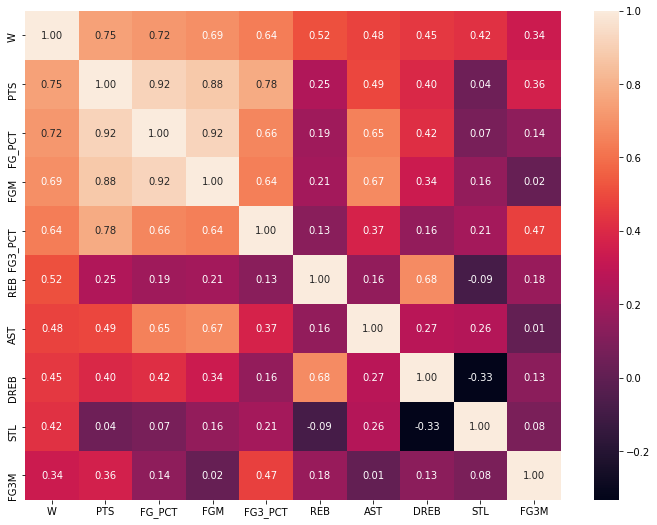

In [117]:
df_teams_corr = df_teams.copy()
df_teams_corr.drop(['TEAM_ID', 'TEAM_NAME', 'GP', 'MIN', 'W_PCT'], axis=1, inplace = True)
corr = df_teams_corr.corr()

k = 10

# encontrando as variáveis mais correlacionadas
cols = corr.nlargest(k, 'W')['W'].index
cm = np.corrcoef(df_teams_corr[cols].values.T)

plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt=".2f", yticklabels=cols.values, xticklabels=cols.values)
plt.show()

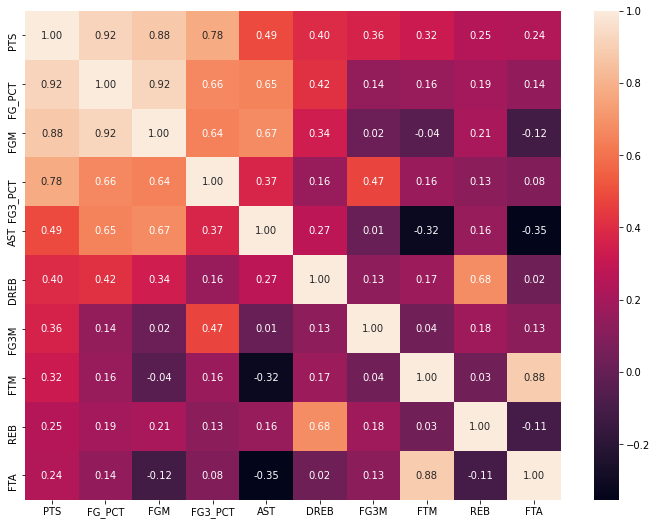

In [118]:
k = 10
df_teams_corr.drop(['W'], axis = 1, inplace = True)
corr = df_teams_corr.corr()

# encontrando as variáveis mais correlacionadas
cols = corr.nlargest(k, 'PTS')['PTS'].index
cm = np.corrcoef(df_teams_corr[cols].values.T)

plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt=".2f", yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Players

In [119]:
df_players.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

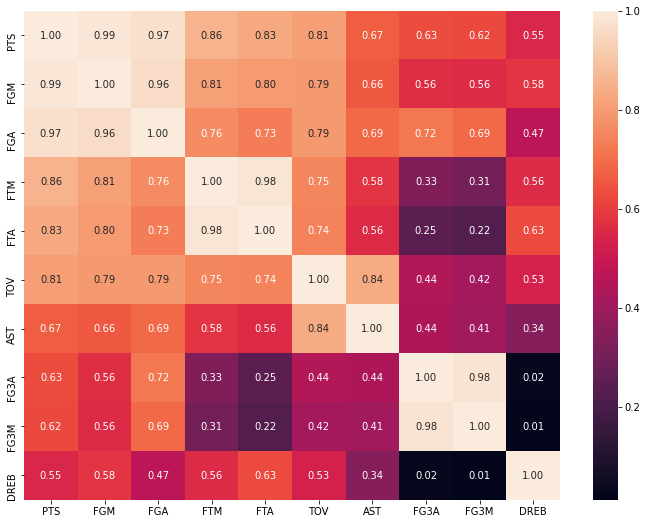

In [120]:
df_players_corr = df_players.copy()
df_players_corr.drop(['PLAYER_ID', 'RANK', 'PLAYER', 'GP', 'MIN', 'EFF'], axis=1, inplace = True)
corr = df_players_corr.corr()

k = 10

# encontrando as variáveis mais correlacionadas
cols = corr.nlargest(k, 'PTS')['PTS'].index
cm = np.corrcoef(df_players_corr[cols].values.T)

plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt=".2f", yticklabels=cols.values, xticklabels=cols.values)
plt.show()